In [1]:
print("Hello Vishal Bhai! 🚀")


Hello Vishal Bhai! 🚀


In [3]:
import pandas as pd

# CSV file load
data = pd.read_csv('Downloads/index.csv')  # path ko sahi rakhna, kyunki file 'Downloads' mein hai

# Top 5 rows dekho
data.head()


,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte


In [4]:
# Structure dekhne ke liye
data.info()

# Missing values dekhne ke liye
data.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133 entries, 0 to 1132
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         1133 non-null   object 
 1   datetime     1133 non-null   object 
 2   cash_type    1133 non-null   object 
 3   card         1044 non-null   object 
 4   money        1133 non-null   float64
 5   coffee_name  1133 non-null   object 
dtypes: float64(1), object(5)
memory usage: 53.2+ KB


date            0
datetime        0
cash_type       0
card           89
money           0
coffee_name     0
dtype: int64

In [5]:
# Dekho kis column mein null hai
data.isnull().sum()


date            0
datetime        0
cash_type       0
card           89
money           0
coffee_name     0
dtype: int64

In [14]:
# date aur datetime ko proper datetime type mein convert karo
data['date'] = pd.to_datetime(data['date'])
data['datetime'] = pd.to_datetime(data['datetime'])


In [13]:
# Month (YYYY-MM), Weekday (0-6), Hour (00-23)
data['month'] = data['date'].dt.strftime('%Y-%m')
data['day'] = data['date'].dt.strftime('%w')
data['hour'] = data['datetime'].dt.strftime('%H')


In [7]:
# Dekho naye columns sahi bane ya nahi
data.head()


,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte


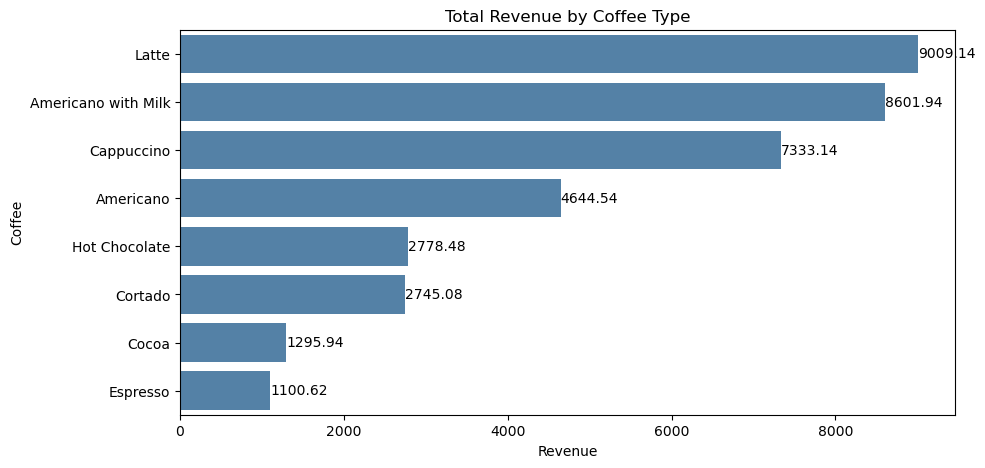

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Total revenue per product
revenue_data = data.groupby('coffee_name')['money'].sum().reset_index().sort_values(by='money', ascending=False)

plt.figure(figsize=(10, 5))
ax = sns.barplot(data=revenue_data, x='money', y='coffee_name', color='steelblue')
ax.bar_label(ax.containers[0])
plt.title("Total Revenue by Coffee Type")
plt.xlabel("Revenue")
plt.ylabel("Coffee")
plt.show()


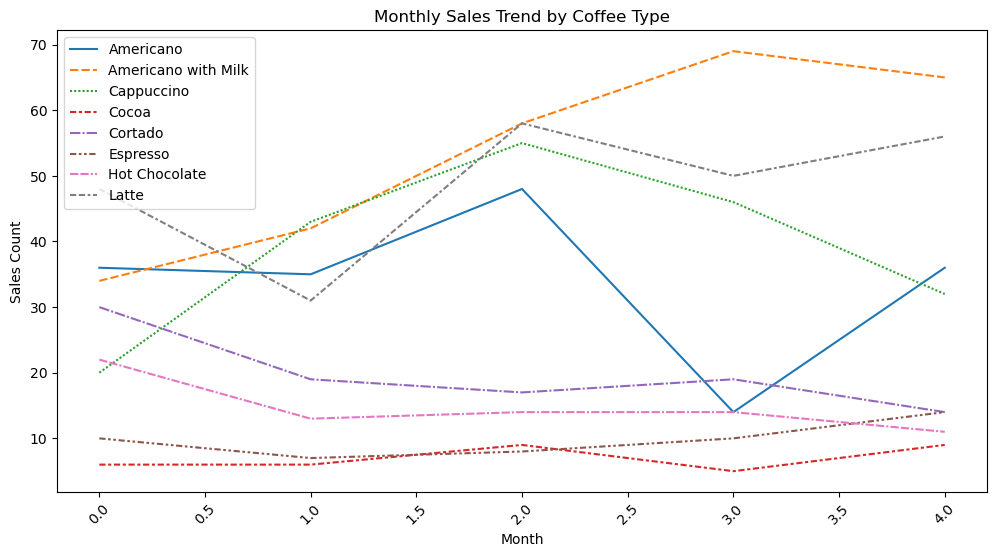

In [17]:
# Count of products sold per month per coffee type
monthly_sales = data.groupby(['coffee_name', 'month']).size().reset_index(name='count')

# Reshape for plotting
monthly_sales_pivot = monthly_sales.pivot(index='month', columns='coffee_name', values='count').fillna(0).reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales_pivot)
plt.xticks(rotation=45)
plt.title("Monthly Sales Trend by Coffee Type")
plt.xlabel("Month")
plt.ylabel("Sales Count")
plt.legend(loc='upper left')
plt.show()


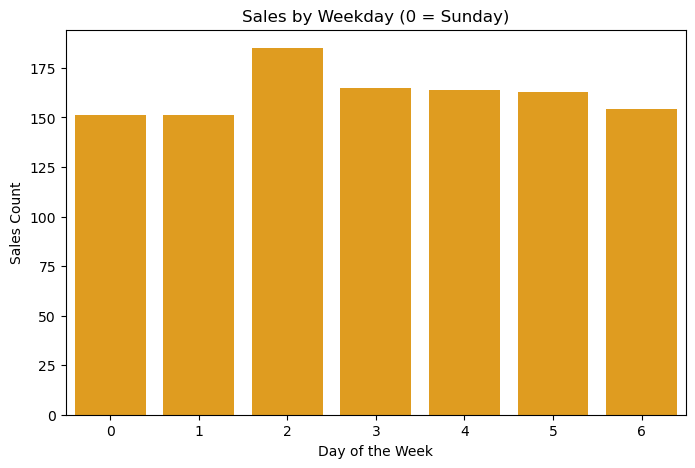

In [18]:
# Count of transactions by weekday
weekday_sales = data['day'].value_counts().sort_index().reset_index()
weekday_sales.columns = ['day', 'count']

plt.figure(figsize=(8, 5))
sns.barplot(data=weekday_sales, x='day', y='count', color='orange')
plt.title("Sales by Weekday (0 = Sunday)")
plt.xlabel("Day of the Week")
plt.ylabel("Sales Count")
plt.show()



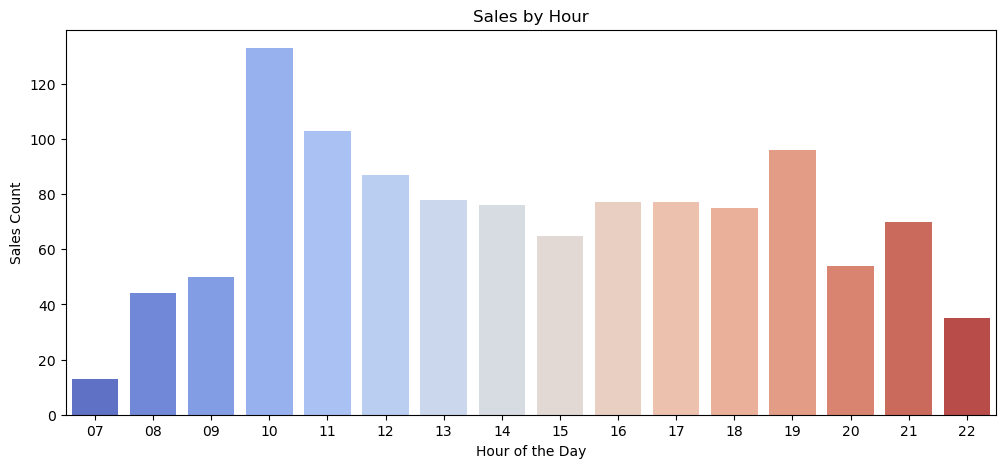

In [19]:

# Count of sales per hour
hourly_sales = data['hour'].value_counts().sort_index().reset_index()
hourly_sales.columns = ['hour', 'count']

plt.figure(figsize=(12, 5))
sns.barplot(data=hourly_sales, x='hour', y='count', palette='coolwarm')
plt.title("Sales by Hour")
plt.xlabel("Hour of the Day")
plt.ylabel("Sales Count")
plt.show()



In [20]:
# % share of each coffee type
data['coffee_name'].value_counts(normalize=True).mul(100).round(2)


Americano with Milk    23.65
Latte                  21.45
Cappuccino             17.30
Americano              14.92
Cortado                 8.74
Hot Chocolate           6.53
Espresso                4.32
Cocoa                   3.09
Name: coffee_name, dtype: float64

In [22]:
# Select features and target
X = data[['coffee_name', 'hour', 'day', 'month']]  # Features
y = data['money']  # Target

# One-hot encoding for categorical features
X = pd.get_dummies(X, drop_first=True)


In [23]:
from sklearn.model_selection import train_test_split

# Split into training and testing (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [24]:
from sklearn.linear_model import LinearRegression

# Initialize and train
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [25]:
from sklearn.metrics import mean_squared_error, r2_score

# Predict
y_pred = model.predict(X_test)

# Evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")


Mean Squared Error: 0.92
R² Score: 0.95


In [26]:
# Dekho kaunsa feature kitna contribute karta hai
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
coefficients.sort_values(by='Coefficient', ascending=False)


,Coefficient
coffee_name_Cocoa,9.894934
coffee_name_Cappuccino,9.826175
coffee_name_Latte,9.802704
coffee_name_Hot Chocolate,9.768789
coffee_name_Americano with Milk,4.935227
hour_22,0.402342
hour_16,0.381339
hour_10,0.264444
day_5,0.194426
day_3,0.148952


In [27]:
# Example: Predict sale amount on Tuesday, 10 AM for a Latte in April
sample = pd.DataFrame([{
    'hour': '10',
    'day': '2',
    'month': '2024-04',
    'coffee_name_Latte': 1
}], columns=X.columns, index=[0]).fillna(0)

model.predict(sample)


array([38.73771862])